<a href="https://colab.research.google.com/github/eaglehkim/python/blob/main/prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SVM : Support Vector Machine
#    - 가장 인공지능스러운 기법
#    - 현재는 입지가 좀 애매, 딥러닝이 휩쓸고 다녀서
#    - 그러나 직관적이고 계산이 빠른 측면이 존재
#    - ex) 앱에서 간단하게 돌아가는 것? SVM이 유리

# SVM - SVC : Support Vector Classifier
#     - SVR : Support Vector Regressor
#        - 거의 SVC를 쓴다, SVC가 정확도도 더 좋은듯?

# 가장 근접한 두 점 사이에 마진(여유분)이 가장 큰 벡터 = 서포트 벡터

# 얼마나 버릴 것이냐? Cost : 값
# - 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지 결정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

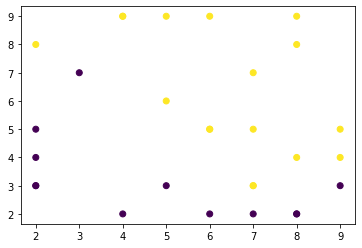

In [14]:
df = pd.read_csv("/content/work.csv")

ap = np.array(df['app'])
pe = np.array(df['per'])
target = np.array(df['fav'])


plt.scatter(ap, pe, c=target);

In [11]:
data = np.column_stack((ap, pe))
data

array([[8, 9],
       [7, 5],
       [2, 3],
       [4, 2],
       [5, 9],
       [9, 3],
       [7, 3],
       [6, 5],
       [7, 2],
       [5, 6],
       [4, 9],
       [9, 5],
       [5, 3],
       [2, 3],
       [7, 3],
       [8, 2],
       [2, 8],
       [3, 7],
       [2, 5],
       [7, 7],
       [6, 9],
       [9, 4],
       [8, 2],
       [6, 5],
       [8, 8],
       [2, 4],
       [8, 4],
       [6, 2],
       [4, 9]])

In [18]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(data, target, 
                                                                      random_state=123)

In [36]:
from sklearn.svm import SVC

# kernel = 어떤 커널을 통해서 값을 도출할 것이냐? 
#          linear(선형)? polynomial(다항,곡선)? RBF(기본값, radius bias function, 가우시안 커널)?
#          RBF - 함수의 형태가 아니라 확률의 형태로 만든다, 조금 더 높은 확률을 고른다.
#                많이 겹쳐있는 애매한 곳은 나누기가 어려워서 확률적으로 고름
#              - gamma 매개변수 : 하나의 데이터 샘플이 영향력을 행사하는 거리
#                               : 감마가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지고
#                                 감마가 낮을수록 커진다

# C = 커질수록 실수를 용납하지 않는다. 과적합 가능성이 높아진다. 0.01, 0.05 등 다양

model = SVC(kernel='linear', C=0.1)     # 장점 - 수치가 나온다
model.fit(input_train, output_train)

model2 = SVC(kernel='poly', C=0.1)
model2.fit(input_train, output_train)

model3 = SVC(kernel='rbf', C=0.1)
model3.fit(input_train, output_train)

print("Linear 학습 점수 : {}".format(model.score(input_train, output_train)))
print("Linear 평가 점수 : {}".format(model.score(input_test, output_test)))
print()

print("Poly 학습 점수 : {}".format(model2.score(input_train, output_train)))
print("Poly 평가 점수 : {}".format(model2.score(input_test, output_test)))
print()

print("RBF 학습 점수 : {}".format(model3.score(input_train, output_train)))
print("RBF 평가 점수 : {}".format(model3.score(input_test, output_test)))

Linear 학습 점수 : 0.8571428571428571
Linear 평가 점수 : 0.875

Poly 학습 점수 : 0.8571428571428571
Poly 평가 점수 : 0.875

RBF 학습 점수 : 0.6190476190476191
RBF 평가 점수 : 0.5


In [37]:
# 선형 svc의 상관계수
coef = model.coef_
coef
# [a1, a2]

array([[0.30882353, 0.51470588]])

In [38]:
intercept = model.intercept_
intercept

array([-3.73529412])

In [39]:
a1 = coef[0][0]
a2 = coef[0][1]

In [40]:
# y = ax + b
a = -(a1/a2)
b = -(intercept[0]/a2)

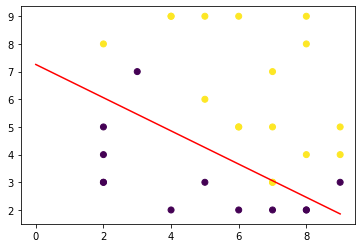

In [41]:
x = np.arange(0, 10)
plt.scatter(ap, pe, c=target)
plt.plot(x, a*x + b, 'r');

In [47]:
# 릿지 : 변수가 중요, 가중치의 제곱들을 더하는 방식이라 급변한다.
# 랏쏘 : 변수보단 조합이 중요하다. 가중치의 절대값들을 더한다

data = pd.read_csv("https://bit.ly/perch_csv")
data.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [55]:
data = np.array(data)
target = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

(56, 56)

In [61]:
input_train, input_test, output_train, output_test = train_test_split(data, target, 
                                                                      random_state=123)

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(input_train, output_train)

LinearRegression()

In [63]:
print("Linear 학습 점수 : {}".format(model.score(input_train, output_train)))
print("Linear 평가 점수 : {}".format(model.score(input_test, output_test)))

Linear 학습 점수 : 0.951804711093903
Linear 평가 점수 : 0.9118165004899212


In [93]:
from sklearn.preprocessing import PolynomialFeatures

model = PolynomialFeatures(degree=1)
train_poly = model.fit_transform(input_train)
test_poly = model.fit_transform(input_test)

In [94]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(train_poly, output_train)

Ridge(alpha=0.1)

In [95]:
model.score(test_poly, output_test)

0.9116868896642765

In [91]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(train_poly, output_train)

Lasso(alpha=0.1)

In [99]:
model.score(test_poly, output_test)

0.9116868896642765